[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/shhommychon/envelope-and-fine-structure/blob/master/test.ipynb)

In [1]:
!git clone https://github.com/shhommychon/envelope-and-fine-structure

Cloning into 'envelope-and-fine-structure'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 23 (delta 5), reused 21 (delta 3), pack-reused 0
Unpacking objects: 100% (23/23), done.


In [2]:
import sys
sys.path.append("/content/envelope-and-fine-structure")

In [3]:
from envelope import EnvelopeFollower, InstantaneousRMS, DirectPeakDetection

In [4]:
algo1 = EnvelopeFollower(freq_cut=150)
algo2 = InstantaneousRMS()
algo3 = DirectPeakDetection(freq_cut=600, interval_length=100)

In [5]:
sr, data = algo1.read_wav("/content/envelope-and-fine-structure/_sample/chonsh_hello.wav")
sr

44100

In [6]:
data = data / 32768

In [7]:
e1, f1 = algo1(data, sampling_rate=sr)
e2, f2 = algo2(data, sampling_rate=sr)
e3, f3 = algo3(data, sampling_rate=sr)

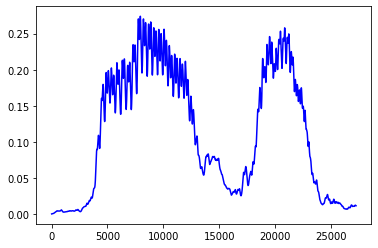

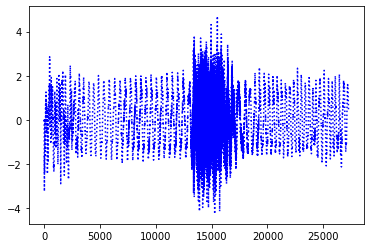

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.arange(e1.shape[0]), e1, 'b-')
plt.show()
plt.plot(np.arange(f1.shape[0]), f1, 'b:')
plt.show()

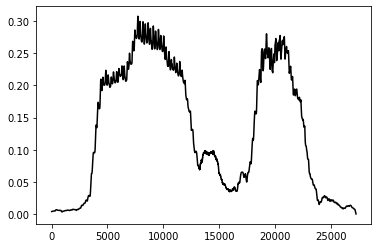

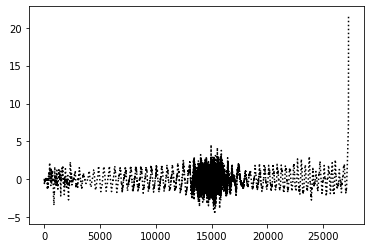

In [9]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.arange(e2.shape[0]), e2, 'k-')
plt.show()
plt.plot(np.arange(f2.shape[0]), f2, 'k:')
plt.show()

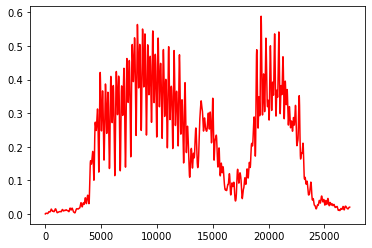

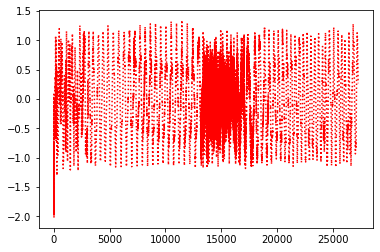

In [10]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.arange(e3.shape[0]), e3, 'r-')
plt.show()
plt.plot(np.arange(f3.shape[0]), f3, 'r:')
plt.show()

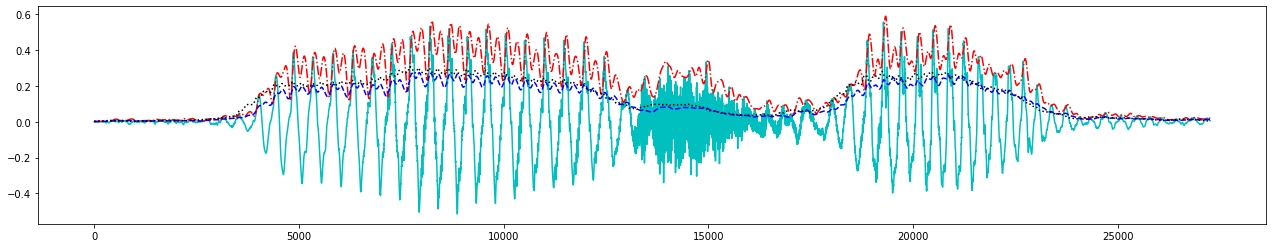

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(22,4))
plt.plot(np.arange(data.shape[0]), data, 'c-')
plt.plot(np.arange(e3.shape[0]), e3, 'r-.')
plt.plot(np.arange(e1.shape[0]), e1, 'b--')
plt.plot(np.arange(e2.shape[0]), e2, 'k:')
plt.show()

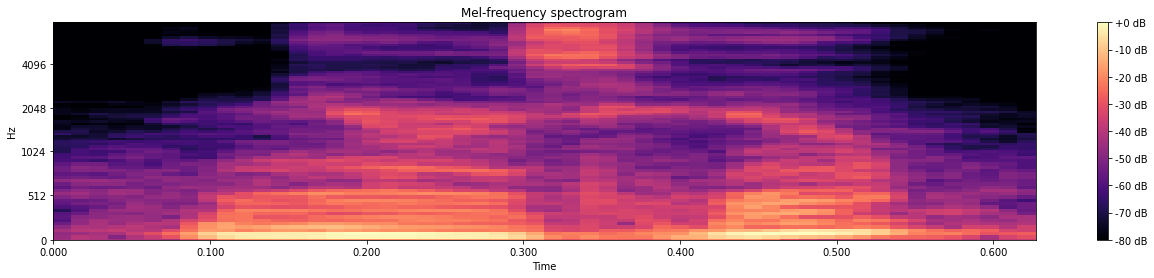

In [12]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(22,4))
img = librosa.display.specshow(
    librosa.power_to_db(
        librosa.feature.melspectrogram(y=data, sr=sr, n_mels=80, fmax=8000), 
        ref=np.max
    ), 
    x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=ax
)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
plt.show()

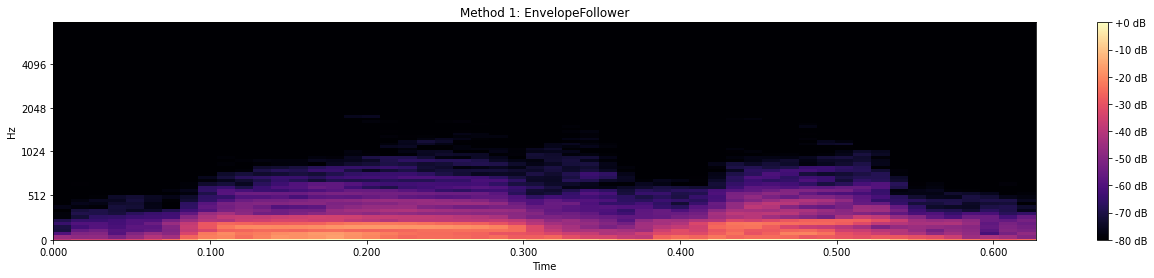

In [13]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(22,4))
img = librosa.display.specshow(
    librosa.power_to_db(
        librosa.feature.melspectrogram(y=e1, sr=sr, n_mels=80, fmax=8000), 
        ref=np.max
    ), 
    x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=ax
)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Method 1: EnvelopeFollower')
plt.show()

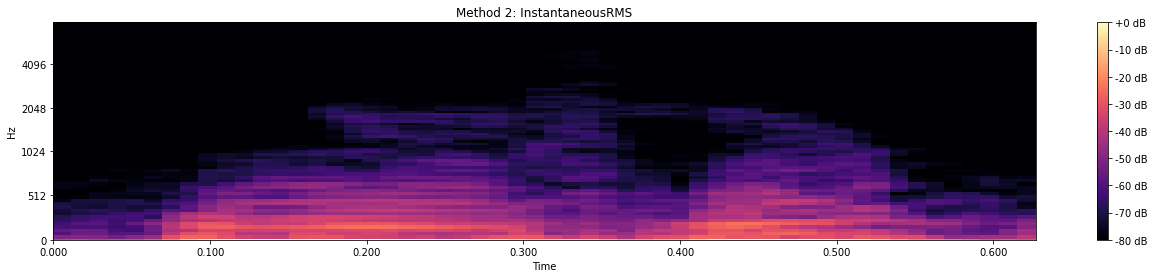

In [14]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(22,4))
img = librosa.display.specshow(
    librosa.power_to_db(
        librosa.feature.melspectrogram(y=e2, sr=sr, n_mels=80, fmax=8000), 
        ref=np.max
    ), 
    x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=ax
)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Method 2: InstantaneousRMS')
plt.show()

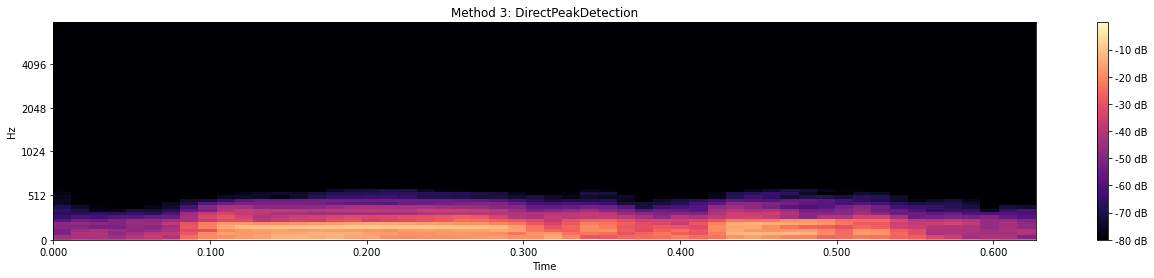

In [15]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(22,4))
img = librosa.display.specshow(
    librosa.power_to_db(
        librosa.feature.melspectrogram(y=e3, sr=sr, n_mels=80, fmax=8000), 
        ref=np.max
    ), 
    x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=ax
)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Method 3: DirectPeakDetection')
plt.show()